In [1]:
from lib.File import File
from matplotlib import pyplot as plt
from data.loader import get_kasios_obs, get_obs, map_path
import numpy as np

from math import sqrt
import pandas as pd

In [2]:
# Loads files and makes conversion if necessary
df_all = get_obs(songs = True)
df_kasios = get_kasios_obs(songs = True)

Loading wav files...
Done.
Loading wav files...
Done.


In [3]:
#X = get_spectres(df_all) # Can be very long
#X.to_pickle("data/all_birds_freq.pickle") # Save to cache
X = pd.read_pickle("data/all_birds_freq.pickle") # Quicker to use cache ;

X.head()

,1900.0,1910.0,1920.0,1930.0,1940.0,1950.0,1960.0,1970.0,1980.0,1990.0,...,5900.0,5910.0,5920.0,5930.0,5940.0,5950.0,5960.0,5970.0,5980.0,5990.0
File ID,,,,,,,,,,,,,,,,,,,,,
402254,-0.777891,-0.398350,-0.014216,-0.855008,2.075899,-0.221931,-0.655440,-1.191778,0.585549,0.236256,...,0.433391,0.306798,-1.075585,-0.452546,-0.197668,-0.996424,-0.379281,-0.244899,-0.400091,-0.611824
406171,-4.162661,-4.180349,-4.229848,-4.230835,-4.269890,-4.245544,-4.282711,-4.257561,-4.243178,-4.282526,...,-1.510778,-1.968467,-1.824303,-1.519034,-1.865900,-1.872201,-1.824038,-1.760304,-1.728515,-1.927553
405901,-0.580728,-0.633019,-0.707576,-0.645468,-0.603866,-0.725716,-0.672938,-0.657233,-0.662175,-0.732691,...,-0.300444,-0.458147,-0.586822,-0.149122,-0.337683,-0.258401,-0.292191,-0.543218,-0.267194,-0.134089
405548,-3.228091,-3.251748,-3.226915,-3.256686,-3.309930,-3.233574,-3.255813,-3.283560,-3.262860,-3.241711,...,7.121533,6.845443,6.915710,6.386549,5.541339,4.538464,2.270188,0.207980,1.365019,3.283181
401782,-3.740562,-3.741388,-3.765818,-3.748055,-3.741544,-3.737901,-3.745398,-3.741317,-3.749377,-3.750319,...,-2.814041,-2.563670,-2.758136,-2.482101,-2.802750,-2.417855,-2.802082,-2.927259,-2.785790,-2.790771


In [4]:
#X_kasios = get_spectres(df_kasios) # Can be very long
#X_kasios.to_pickle("data/kasios_birds_freq.pickle")
X_kasios = pd.read_pickle("data/kasios_birds_freq.pickle") # Quicker to use cache ;)

X_kasios.head()

,1900.0,1910.0,1920.0,1930.0,1940.0,1950.0,1960.0,1970.0,1980.0,1990.0,...,5900.0,5910.0,5920.0,5930.0,5940.0,5950.0,5960.0,5970.0,5980.0,5990.0
ID,,,,,,,,,,,,,,,,,,,,,
1,-3.529268,-3.329053,-3.513426,-3.523270,-3.362683,-3.481535,-3.410325,-3.471149,-3.358526,-3.415705,...,-3.231955,-3.377782,-3.150853,-3.322742,-3.141581,-3.317984,-3.318084,-3.201280,-3.373770,-3.249895
2,-7.770975,-7.789180,-7.807659,-7.812153,-7.826096,-7.787444,-7.798715,-7.757632,-7.766777,-7.717729,...,2.070107,1.240989,0.342733,1.253810,-0.095410,0.345641,-0.313179,-0.376685,-0.871546,-0.830625
3,-10.823887,-10.997442,-10.907166,-10.946253,-10.891168,-10.957196,-11.014657,-10.992509,-10.977279,-11.082591,...,-7.309365,-7.188007,-8.339784,-6.470934,-6.471953,-7.001865,-8.281127,-7.377273,-7.894899,-7.307045
4,-7.564831,-7.604928,-7.853263,-7.667681,-7.446895,-7.664611,-7.868092,-7.727359,-7.579639,-7.770928,...,-6.860031,-6.743433,-6.865163,-6.472720,-6.746985,-6.491604,-6.479721,-6.478345,-6.351524,-6.770690
5,13.974970,13.250154,12.210977,12.134556,11.516458,11.235900,10.998921,10.493838,10.029321,9.747640,...,-3.994871,-3.862566,-3.970654,-4.009346,-3.824077,-4.031627,-3.842823,-3.883048,-4.091320,-3.786353


## Learning

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix

/home/ruth/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [6]:
df_all.English_name.unique()

array(['Rose-crested Blue Pipit', 'Blue-collared Zipper', 'Bombadil',
       'Broad-winged Jojo', 'Canadian Cootamum',
       'Carries Champagne Pipit', 'Darkwing Sparrow',
       'Eastern Corn Skeet', 'Green-tipped Scarlet Pipit',
       'Lesser Birchbeere', 'Orange Pine Plover', 'Ordinary Snape',
       'Pinkfinch', 'Purple Tooting Tout', 'Qax', 'Queenscoat',
       'Bent-beak Riffraff', 'Scrawny Jay', 'Vermillion Trillian'],
      dtype=object)

In [7]:
Y = df_all.English_name #== "Rose-crested Blue Pipit"

## Fitting

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33)

In [9]:
clf = RandomForestClassifier(n_estimators=100, max_depth=7)

In [10]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## Résultats

In [11]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

In [12]:
print("Confusion sur le train : (Overfit)")
print(confusion_matrix(y_train, y_pred_train))

print("\n")

print("Confusion sur le test :")
print(confusion_matrix(y_test, y_pred_test))

print()

Confusion sur le train : (Overfit)
[[ 46   0   0   0   0   0   0   0   2   1   0   0   0   0   0   0   0   0
    0]
 [  0  24   2   0   0   4   3   0   0   1   3   1   0   0   0   0   3   1
    0]
 [  0   0  83   2   1   0   2   0   0   1   4   0   0   0   0   0   2   1
    0]
 [  1   0   5  45   0   0   0   0   0   0   2   0   0   0   2   0   1   1
    2]
 [  0   0   0   0  40   1   0   1   1   3   5   2   0   0   1   0   3   2
    0]
 [  1   0   2   0   0  60   0   0   0   1   1   3   0   0   0   1   3   2
    0]
 [  1   0   2   0   0   1  51   0   1   0   1   2   0   0   0   0   3   0
    0]
 [  0   0   0   0   0   5   3  22   0   9   0   3   0   0   1   0   8   2
    0]
 [  1   0   0   0   0   0   0   0  55   2   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0   3  96   1   1   0   0   0   0   1   0
    0]
 [  0   0   1   1   0   1   0   0   1   0 132   0   0   0   1   0   0   0
    0]
 [  0   0   3   0   3   5   3   0   0   0   2  40   0   0   0   0   5   1


In [13]:
print(accuracy_score(y_train, y_pred_train))
print("Accuracy: %s" % accuracy_score(y_test,y_pred_test))

0.796242774566474
Accuracy: 0.4890190336749634


In [14]:
y_kasios = clf.predict(X_kasios)

In [15]:
print("Classification with Random Forest \n")
for i in range(len(y_kasios)):
    print("Kasios song n°%s : %s"% (i+1, y_kasios[i]))

Classification with Random Forest 

Kasios song n°1 : Bent-beak Riffraff
Kasios song n°2 : Rose-crested Blue Pipit
Kasios song n°3 : Bombadil
Kasios song n°4 : Darkwing Sparrow
Kasios song n°5 : Orange Pine Plover
Kasios song n°6 : Green-tipped Scarlet Pipit
Kasios song n°7 : Scrawny Jay
Kasios song n°8 : Lesser Birchbeere
Kasios song n°9 : Rose-crested Blue Pipit
Kasios song n°10 : Orange Pine Plover
Kasios song n°11 : Queenscoat
Kasios song n°12 : Orange Pine Plover
Kasios song n°13 : Rose-crested Blue Pipit
Kasios song n°14 : Darkwing Sparrow
Kasios song n°15 : Orange Pine Plover


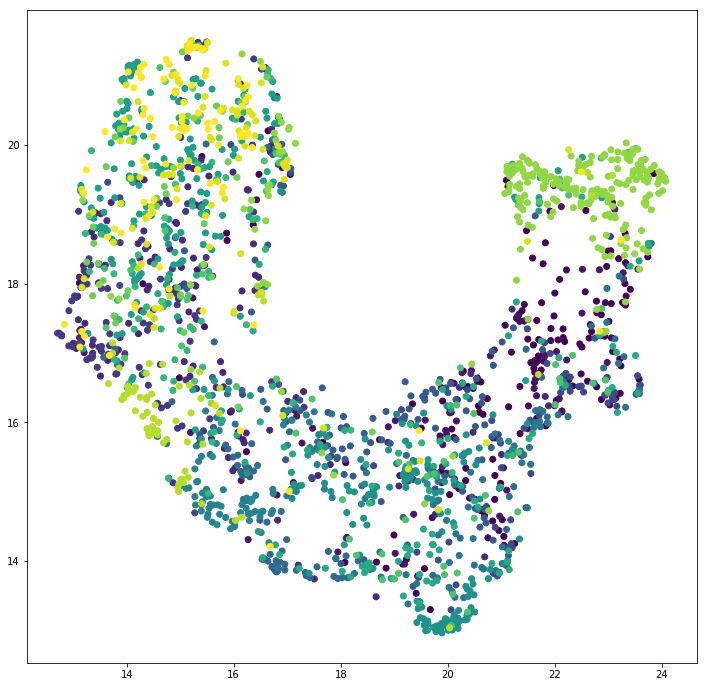

In [62]:
import umap
import seaborn as sns

bird_type = np.array(Y)[:]
for i in range(len(Y)):
    for j in range(len(Y.unique())):
        if bird_type[i] == Y.unique()[j]:
            bird_type[i] = j

plt.figure(figsize=(12,12))
data = np.c_[X,bird_type]
embedding = umap.UMAP().fit_transform(data)
plt.scatter(embedding[:,0],embedding[:,1], c=bird_type)
#plt.axis('off')

In [70]:
bird_two_type = (np.array(Y)=='Rose-crested Blue Pipit')*1

In [71]:
print(bird_two_type)

[1 1 1 ... 0 0 0]


In [ ]:
Y.astype('category').cat.codes #pour convertir direct en nombre